In [1]:
import numpy as np
%load_ext autoreload 
%autoreload 1
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import michael_solotky as oracle

In [2]:
params = {
    "amin": 75,
    "amax": 90,
    "bmin": 500,
    "bmax": 600,
    "p1": 0.1,
    "p2": 0.01,
    "p3": 0.3
}

In [3]:
a_min = params["amin"]
a_max = params["amax"]
b_min = params["bmin"]
b_max = params["bmax"]
c_min = 0
c_max = a_max + b_max
d_min = 0
d_max = 2 * c_max

In [4]:
a = np.arange(a_min, a_max + 1)
b = np.arange(b_min, b_max + 1)
c = np.arange(c_max + 1)
d = np.arange(d_max + 1)

## 2)

In [5]:
mean_a = oracle.arithmetic_round(oracle.expect_of_distr(*oracle.pa(params, model=1)))
mean_a

83

In [6]:
mean_b = oracle.arithmetic_round(oracle.expect_of_distr(*oracle.pb(params, model=1)))
mean_b

550

In [7]:
mean_c = oracle.arithmetic_round(oracle.expect_of_distr(*oracle.pc(params, model=1)))
mean_c

14

In [8]:
mean_c = oracle.arithmetic_round(oracle.expect_of_distr(*oracle.pc(params, model=2)))
mean_c

14

In [9]:
mean_d = oracle.arithmetic_round(oracle.expect_of_distr(*oracle.pd(params, model=1)))
mean_d

18

In [10]:
mean_d = oracle.arithmetic_round(oracle.expect_of_distr(*oracle.pd(params, model=2)))
mean_d

18

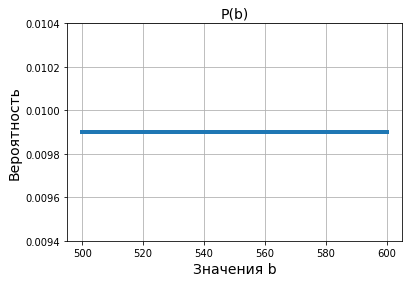

In [139]:
x = np.arange(b_min, b_max + 1)
distr_pb = oracle.pb(params, model=1)[0]
plt.plot(x, distr_pb, linewidth=4)
plt.ylim(0.0094, 0.0104)
plt.title("P(b)", fontsize=14)
plt.xlabel("Значения b", fontsize=14)
plt.ylabel("Вероятность", fontsize=14)
plt.grid()
plt.savefig('report/pb.pdf', bbox_inches='tight')

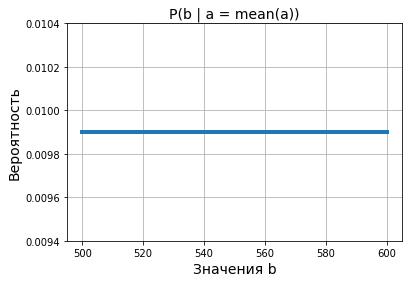

In [134]:
x = np.arange(b_min, b_max + 1)
a = np.arange(a_min, a_max + 1)
distr_pb_a = oracle.pb_a(a, params, model=1)[0][:, mean_a - a_min]
plt.plot(x, distr_pb_a, linewidth=4)
plt.ylim(0.0094, 0.0104)
plt.title("P(b | a = mean(a))", fontsize=14)
plt.xlabel("Значения b", fontsize=14)
plt.ylabel("Вероятность", fontsize=14)
plt.grid()
plt.savefig('report/pb_a.pdf', bbox_inches='tight')

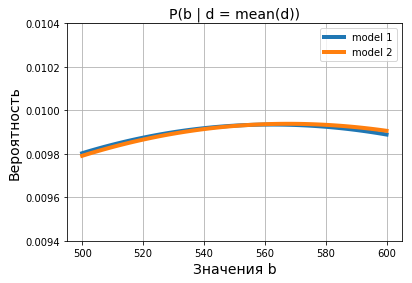

In [137]:
x = np.arange(params["bmin"], params["bmax"] + 1)
d = np.arange(d_max + 1)
distr_pb_d_1 = oracle.pb_d(d, params, model=1)[0][:, mean_d]
distr_pb_d_2 = oracle.pb_d(d, params, model=2)[0][:, mean_d]
plt.plot(x, distr_pb_d_1, linewidth=4, label="model 1")
plt.plot(x, distr_pb_d_2, linewidth=4, label="model 2")
plt.ylim(0.0094, 0.0104)
plt.title("P(b | d = mean(d))", fontsize=14)
plt.xlabel("Значения b", fontsize=14)
plt.ylabel("Вероятность", fontsize=14)
plt.legend()
plt.grid()
plt.savefig('report/pb_d.pdf', bbox_inches='tight')

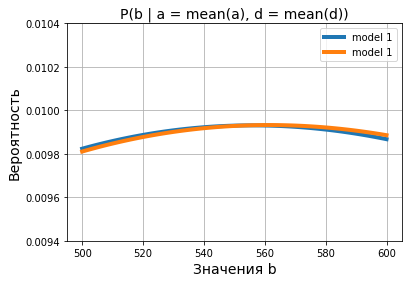

In [138]:
x = np.arange(params["bmin"], params["bmax"] + 1)
a = np.arange(a_min, a_max + 1)
d = np.arange(d_max + 1)
distr_pb_ad_1 = oracle.pb_ad(a, d, params, model=1)[0][:, mean_a - a_min, mean_d]
distr_pb_ad_2 = oracle.pb_ad(a, d, params, model=2)[0][:, mean_a - a_min, mean_d]
plt.plot(x, distr_pb_ad_1, linewidth=4, label="model 1")
plt.plot(x, distr_pb_ad_2, linewidth=4, label="model 1")
plt.ylim(0.0094, 0.0104)
plt.title("P(b | a = mean(a), d = mean(d))", fontsize=14)
plt.xlabel("Значения b", fontsize=14)
plt.ylabel("Вероятность", fontsize=14)
plt.legend()
plt.grid()
plt.savefig('report/pb_ad.pdf', bbox_inches='tight')

## Матожидания величины b

In [15]:
expect_pb = oracle.expect_of_distr(distr_pb, b)
expect_pb

550.0

In [16]:
expect_pb_d_1 = oracle.expect_of_distr(distr_pb_d_1, b)
expect_pb_d_1

550.0726755897826

In [17]:
expect_pb_d_2 = oracle.expect_of_distr(distr_pb_d_2, b)
expect_pb_d_2

550.0977797601525

In [18]:
expect_pb_ad_1 = oracle.expect_of_distr(distr_pb_ad_1, b)
expect_pb_ad_1

550.0363468930652

In [19]:
expect_pb_ad_2 = oracle.expect_of_distr(distr_pb_ad_2, b)
expect_pb_ad_2

550.0634796135495

## Дисперсии величины b

In [20]:
variance_pb = oracle.variance_of_distr(distr_pb, b)
variance_pb

850.0

In [21]:
variance_pb_d_1 = oracle.variance_of_distr(distr_pb_d_1, b)
variance_pb_d_1

848.0378918390488

In [22]:
variance_pb_d_2 = oracle.variance_of_distr(distr_pb_d_2, b)
variance_pb_d_2

848.1280274537858

In [23]:
variance_pb_ad_1 = oracle.variance_of_distr(distr_pb_ad_1, b)
variance_pb_ad_1

848.031125546142

In [24]:
variance_pb_ad_2 = oracle.variance_of_distr(distr_pb_ad_2, b)
variance_pb_ad_2

848.1231120711309

## Относительная важность

In [65]:
%%time
n_1 = 100
n_2 = 100
p_1 = np.arange(n_1 + 1) / n_1
p_2 = np.arange(n_2 + 1) / n_2
variance_matrix_pc_b = np.empty((n_1 + 1, n_2 + 1))
variance_matrix_pc_a = np.empty((n_1 + 1, n_2 + 1))
params_copy = params.copy()
for i in range(n_1 + 1):
    for j in range(n_2 + 1):
        params_copy["p1"] = p_1[i]
        params_copy["p2"] = p_2[j]
        distr_pc_b, val = oracle.pc_b(np.array(mean_b), params_copy, model=1)
        variance_matrix_pc_b[i, j] = oracle.variance_of_distr(distr_pc_b[:, 0], val)
        distr_pc_a, val = oracle.pc_a(np.array(mean_a), params_copy, model=1)
        variance_matrix_pc_a[i, j] = oracle.variance_of_distr(distr_pc_a[:, 0], val)

CPU times: user 7min 9s, sys: 5.85 s, total: 7min 15s
Wall time: 7min 15s


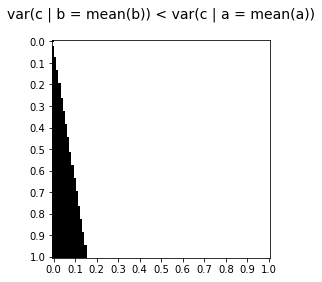

In [103]:
plt.imshow(variance_matrix_pc_b < variance_matrix_pc_a, interpolation='none', cmap='gray')
plt.title('var(c | b = mean(b)) < var(c | a = mean(a))\n', fontsize=14)
plt.xticks(np.arange(11) * 10, np.arange(11) / 10)
plt.yticks(np.arange(11) * 10, np.arange(11) / 10)
plt.savefig('report/var_pc_b<var_pc_a.pdf', bbox_inches='tight')

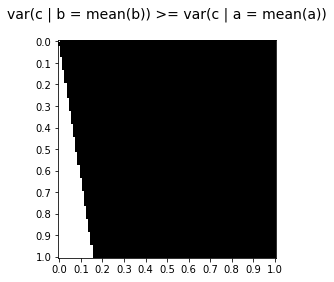

In [104]:
plt.imshow(variance_matrix_pc_b >= variance_matrix_pc_a, interpolation='none', cmap='gray')
plt.title('var(c | b = mean(b)) >= var(c | a = mean(a))\n', fontsize=14)
plt.xticks(np.arange(11) * 10, np.arange(11) / 10)
plt.yticks(np.arange(11) * 10, np.arange(11) / 10)
plt.savefig('report/var_pc_b>=var_pc_a.pdf', bbox_inches='tight')

In [108]:
a = np.arange(a_min, a_max + 1)
b = np.arange(b_min, b_max + 1)
c = np.arange(c_max + 1)
d = np.arange(d_max + 1)

## Модель 1

In [121]:
%%timeit
oracle.pc(params, model=1)
pass

99.2 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [122]:
%%timeit
oracle.pc_a(a, params, model=1)
pass

111 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [123]:
%%timeit
oracle.pc_b(b, params, model=1)
pass

108 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [124]:
%%timeit
oracle.pb_a(a, params, model=1)
pass

2.48 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [125]:
%%timeit
oracle.pb_d(d, params, model=1)
pass

233 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [126]:
%%timeit
oracle.pb_ad(a, d, params, model=1)
pass

2.42 s ± 198 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [127]:
%%timeit
oracle.pd(params, model=1)
pass

165 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Модель 2

In [140]:
%%timeit
oracle.pc(params, model=2)
pass

59.7 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [141]:
%%timeit
oracle.pc_a(a, params, model=2)
pass

58.6 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [142]:
%%timeit
oracle.pc_b(b, params, model=2)
pass

63.8 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [143]:
%%timeit
oracle.pb_a(a, params, model=2)
pass

2.63 µs ± 72.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [144]:
%%timeit
oracle.pb_d(d, params, model=2)
pass

172 ms ± 4.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [145]:
%%timeit
oracle.pb_ad(a, d, params, model=2)
pass

2.19 s ± 41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [146]:
%%timeit
oracle.pd(params, model=2)
pass

115 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
